In [21]:
#here we import the dependencies
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers  import Conv2D,MaxPooling2D,Input,UpSampling2D,concatenate
from keras.models import Model
from keras.utils import plot_model


In [27]:
#now here we use the keras functional api to create the U-net architecture

input= Input((256,256,1))

#now we code the encoder part
s1=Conv2D(64,3,activation='relu',padding='same')(input)
s1_1=Conv2D(64,3,activation='relu',padding='same')(s1)
#then we use the maxpooling layer to downsample our input shape

p1=MaxPooling2D(pool_size=(2,2))(s1_1)

#now we again use the convolutional layers to find out the features
s2=Conv2D(128,3,activation='relu',padding='same')(p1)
s2_1=Conv2D(128,3,activation='relu',padding='same')(s2)

#use the maxpool layer
p2=MaxPooling2D(pool_size=(2,2))(s2_1)


#now we again use the convolutional layers to find out the features
s3=Conv2D(256,3,activation='relu',padding='same')(p2)
s3_1=Conv2D(256,3,activation='relu',padding='same')(s3)

#use the maxpool layer
p3=MaxPooling2D(pool_size=(2,2))(s3_1)


#now we again use the convolutional layers to find out the features
s4=Conv2D(512,3,activation='relu',padding='same')(p3)
s4_1=Conv2D(512,3,activation='relu',padding='same')(s4)

#use the maxpool layer
p4=MaxPooling2D(pool_size=(2,2))(s4_1)


#now we again use the convolutional layers to find out the features
b1=Conv2D(1024,3,activation='relu',padding='same')(p4)
b1_1=Conv2D(1024,3,activation='relu',padding='same')(b1)
#this was the last vector
#now we move to the decoder part



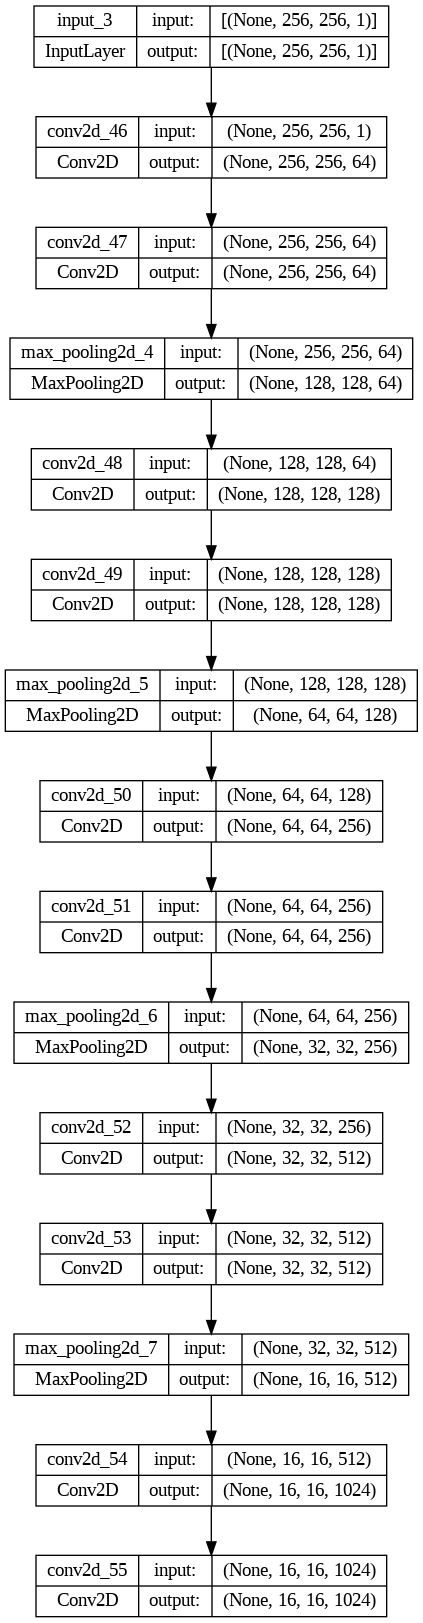

In [28]:
#i ahve decribed the above layers , now i take them inside the model
#lets check for the encoder part
model=Model(inputs=input,outputs=b1_1)
#we now visualize the model

plot_model(model,show_shapes=True,show_layer_names=True)

In [29]:
#this is the decoder part
#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c1=UpSampling2D(size=(2,2))(b1_1)
#we now give it to the convolutional layer
d1=Conv2D(512,2,activation='relu',padding='same')(c1)
d1=concatenate([s4_1,d1])
d1_1=Conv2D(512,3,activation='relu',padding='same')(d1)
d1_2=Conv2D(512,3,activation='relu',padding='same')(d1_1)


#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c2=UpSampling2D(size=(2,2))(d1_2)
#we now give it to the convolutional layer
d2=Conv2D(256,2,activation='relu',padding='same')(c2)
d2=concatenate([s3_1,d2])
d2_1=Conv2D(256,3,activation='relu',padding='same')(d2)
d2_2=Conv2D(256,3,activation='relu',padding='same')(d2_1)


#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c3=UpSampling2D(size=(2,2))(d2_2)
#we now give it to the convolutional layer
d3=Conv2D(128,2,activation='relu',padding='same')(c3)
d3=concatenate([s2_1,d3])
d3_1=Conv2D(128,3,activation='relu',padding='same')(d3)
d3_2=Conv2D(128,3,activation='relu',padding='same')(d3_1)



#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c4=UpSampling2D(size=(2,2))(d3_2)
#we now give it to the convolutional layer
d4=Conv2D(64,2,activation='relu',padding='same')(c4)
d4=concatenate([s1_1,d4])
d4_1=Conv2D(64,3,activation='relu',padding='same')(d4)
d4_2=Conv2D(64,3,activation='relu',padding='same')(d4_1)


#we now give it to the convolutional layer
d5=Conv2D(2,3,activation='relu',padding='same')(d4_2)
out=Conv2D(1,1,activation='sigmoid',padding='same')(d5)





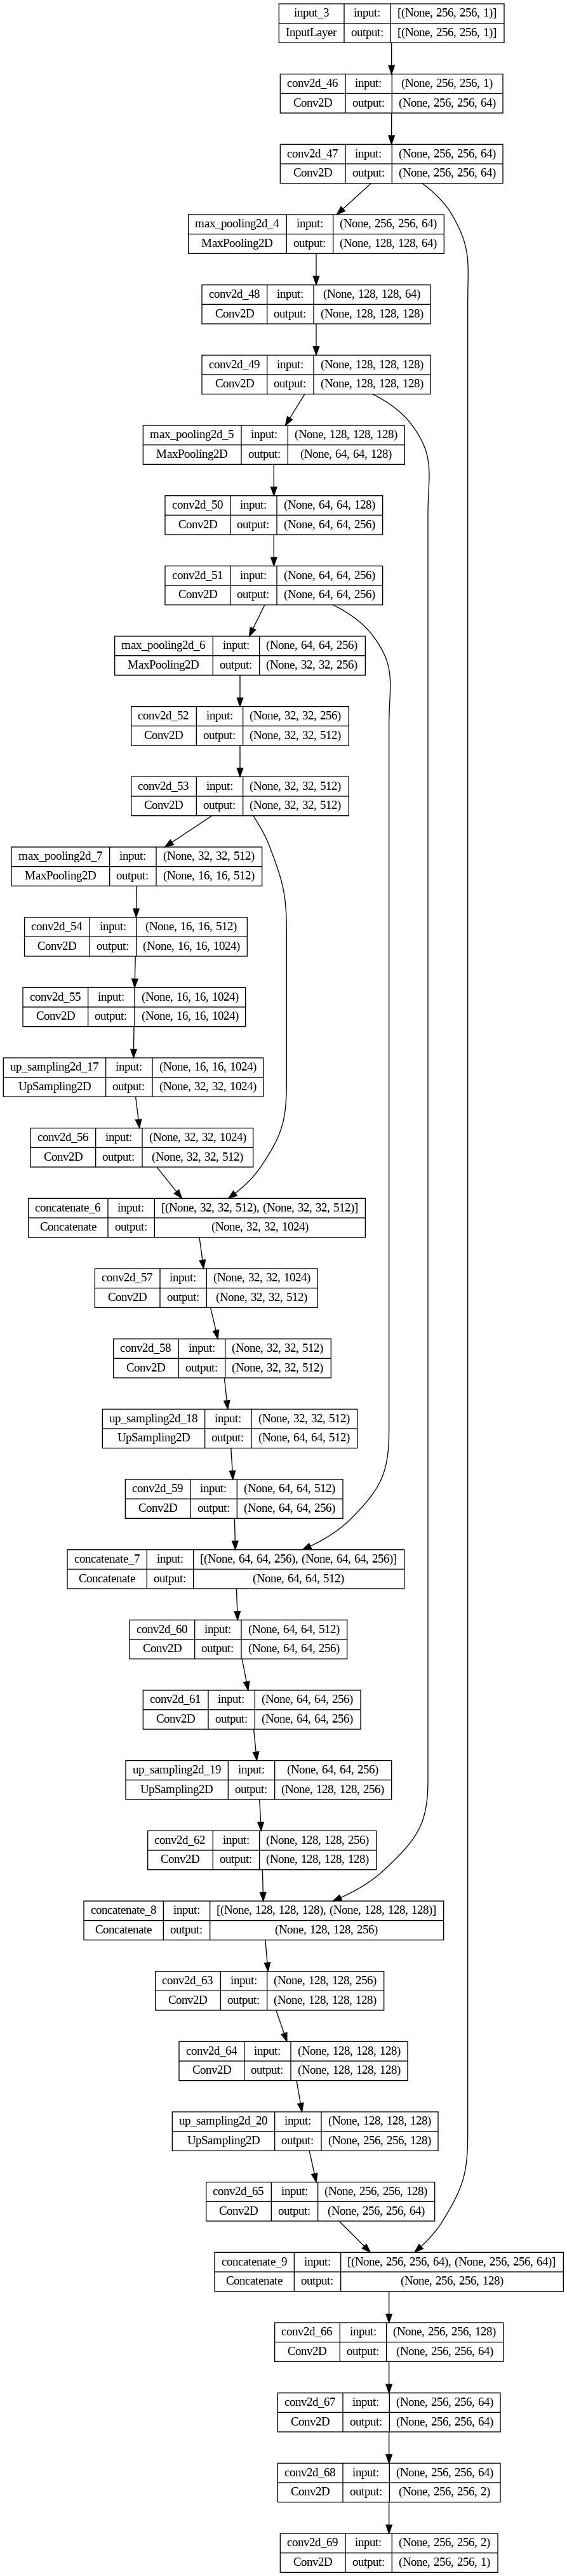

In [30]:
#we now try to check for the decoder part also
model=Model(inputs=input,outputs=out)
plot_model(model,show_shapes=True,show_layer_names=True)

In [31]:
#now we hahve succesfully integrated the encoder and the decoder part
#we now i have made the unet model , now we need to compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
    )


In [33]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d_46 (Conv2D)          (None, 256, 256, 64)         640       ['input_3[0][0]']             
                                                                                                  
 conv2d_47 (Conv2D)          (None, 256, 256, 64)         36928     ['conv2d_46[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 64)         0         ['conv2d_47[0][0]']           
 g2D)                                                                                       